## Apply ICA to gene dependencies

Independent Component Analysis (ICA) is a dimensionality reduction method that separates a multivariate signal into additive, independent components.

We apply it to GeneEffect scores here and save latent representations (ICA components) for downstream comparative analyses (to compare with BetaVAE).


In [2]:
import sys
import pathlib
import pandas as pd
import plotnine as gg
from sklearn.decomposition import FastICA

sys.path.insert(0, "../utils/")
from data_loader import load_model_data

In [6]:
data_directory = pathlib.Path("../0.data-download/data")
dependency_file = pathlib.Path(f"{data_directory}/CRISPRGeneEffect.parquet")
gene_dict_file = pathlib.Path(f"{data_directory}/CRISPR_gene_dictionary.parquet")

output_dir = pathlib.Path("results")
ica_output_file = pathlib.Path(f"{output_dir}/ica_latent.parquet.gz")
output_ica_weights_file = pathlib.Path(f"{output_dir}/ICA_weight_matrix_gsea.parquet")

In [7]:
ica_components = 50

In [9]:
# Load data
dependency_df, gene_dict_df = load_model_data(dependency_file, gene_dict_file)

(1150, 18444)


TypeError: read_table() got an unexpected keyword argument 'sep'

# Perform ICA

In [ ]:
ica = FastICA(n_components=ica_components, random_state=0)
ica.fit(dependency_df.drop(columns=["ModelID"]))

PCA(n_components=50)

In [ ]:
#Transform models into ICA space
dependency_df_transformed = pd.DataFrame(
   ica.transform(dependency_df.drop(columns=["ModelID"]))
)

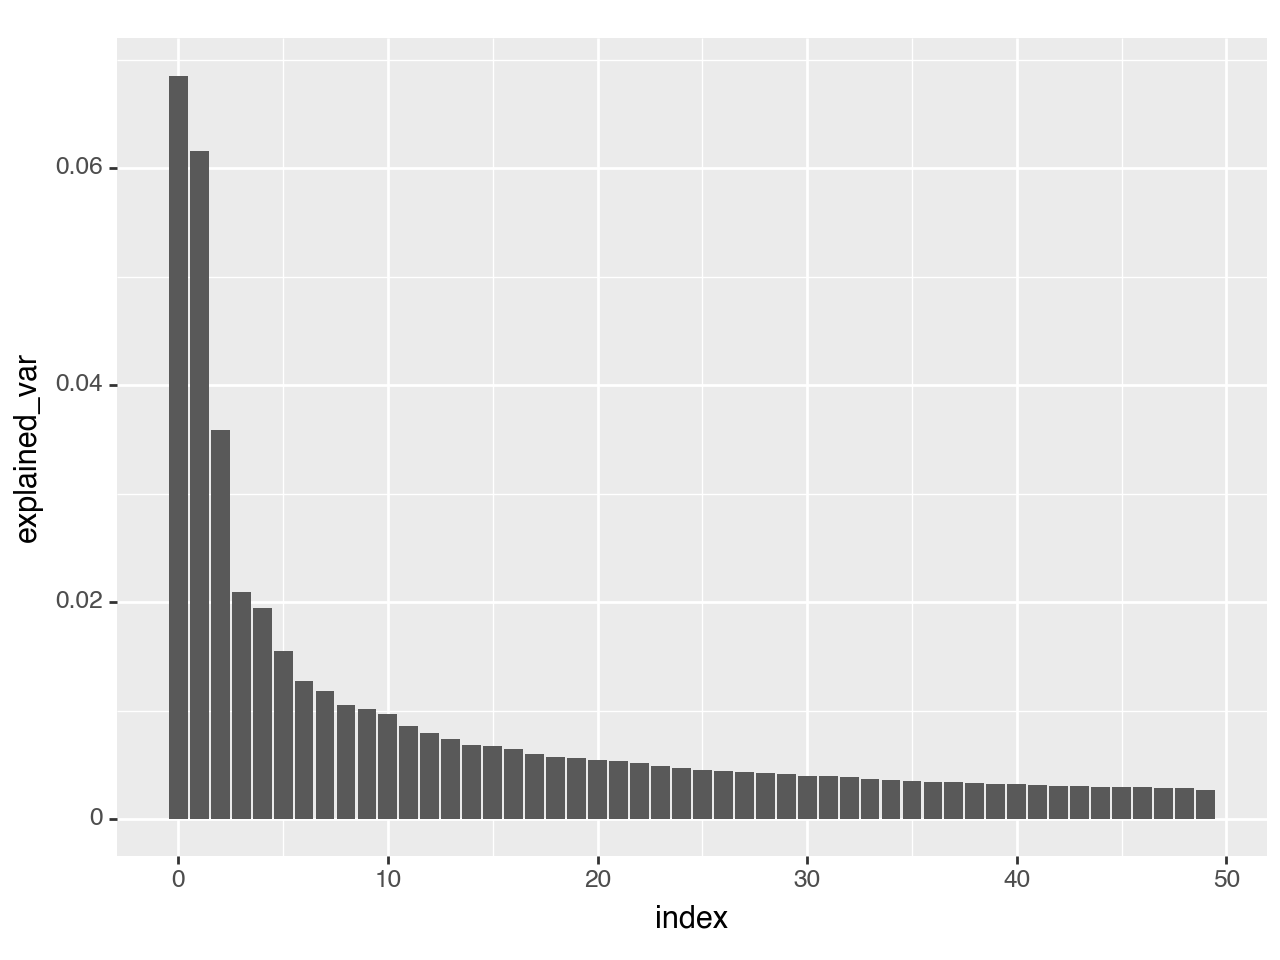

<Figure Size: (640 x 480)>

In [ ]:
# Recode column space and add back model IDs
dependency_df_transformed.columns = [f"ICA_{x}" for x in range(0, dependency_df_transformed.shape[1])]
dependency_df_transformed = pd.concat([dependency_df.loc[:, "ModelID"], dependency_df_transformed], axis="columns")


dependency_df_transformed.to_parquet(ica_output_file, index=False)


print(dependency_df_transformed.shape)
dependency_df_transformed.head(3)

In [ ]:
# Obtain weights, which can be used in GSEA
ica_weights = pd.DataFrame(ica.mixing_, index=dependency_df.drop(columns=["ModelID"]).columns.tolist())
ica_weights.columns = [f"ICA_{x}" for x in range(ica_weights.shape[1])]


ica_weights = ica_weights.reset_index().rename(columns={"index": "genes"})


ica_weights.to_parquet(output_ica_weights_file, index=False)


print(ica_weights.shape)
ica_weights.head(3)